<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're goint to learn how to write neural network with classification problems


types of classification problems:
* binary
* multiclass classification
* multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out the features (X)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


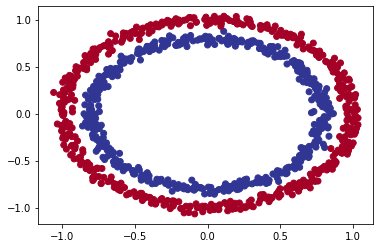

In [ ]:
# Lets plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

In [ ]:
# Input & Output shape
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. [Tweak
6. Evaluate]

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Note: the 'accuracy' metrics tells us out of X # of samples, how many did we get right? %
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics='accuracy')


model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and ourmodel is ggetting around ~50% accuracy... it's perfming as if it's guessing
Let's try to improve our model by adding an extra layer

In [ ]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics='accuracy')

model_2.fit(X, y, epochs=5, verbose=0)

model_2.fit(X, y, epochs=200, verbose=0)
print('evaluation of model_2:', model_2.evaluate(X, y))


32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
evaluation of model_2: [0.6935995817184448, 0.5]


In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving our model

How can we improve our model because right now it looks like it is just guessing?



In [ ]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

model_3.fit(X, y, epochs=5, verbose=0)

model_3.fit(X, y, epochs=100, verbose=0)
print('evaluation of model_3:', model_3.evaluate(X, y))


32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5080
evaluation of model_3: [0.6979429125785828, 0.5080000162124634]


To visualize our models predictions let's create a function `plot_decision_boundary()`


* Take in trained model X, y
* Create a meshgrid of the different x values
* make predictions across the meshgrid
* plot the predictions as well as a line between zones (where each unique class falls


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)

  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2d arrays togeher

  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


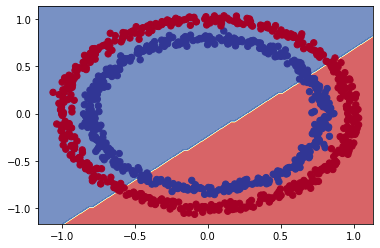

In [ ]:
# Checkout the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

We compiled our model for a binary classification problem, but we're now working on a regression problem. Let's change the model to suit our data

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100, verbose=0)

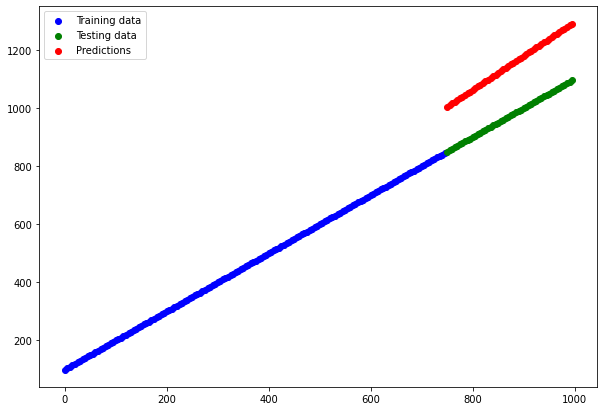

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
# The missing piece : None-linearity

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, tf.keras.activations.linear)
])


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
first_X=X[:, 0]
second_X=X[:, 1]

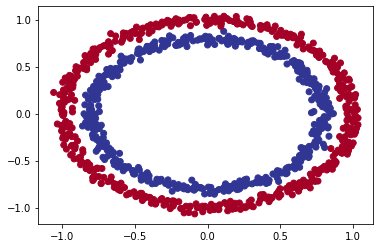

In [ ]:
# Check out our data
plt.scatter(first_X, second_X, c=y, cmap=plt.cm.RdYlBu)

doing binary classification


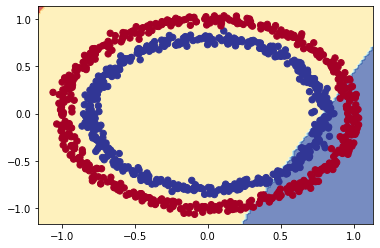

In [ ]:
# Check the descision boundary for model
plot_decision_boundary(model_4, X, y)

Let's try to build first NN with a nonlinear activation function


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, tf.keras.activations.relu)
])


model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_5.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1),

])


model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_6.fit(X, y, epochs=250, verbose=0)

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


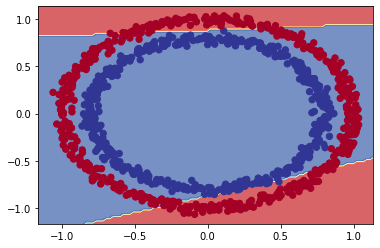

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_7.fit(X, y, epochs=100, verbose=0)

doing binary classification


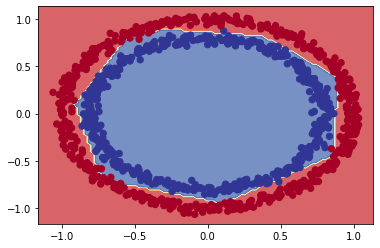

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

**Question:** What's wrong with the predictions we've made?
We need to split our data

**Note:** The combination of linear and non-linear functions is one of the key fundamentals of NN

Now we've discussed the concept of linear a and non-linear functions, let's see them in action


In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

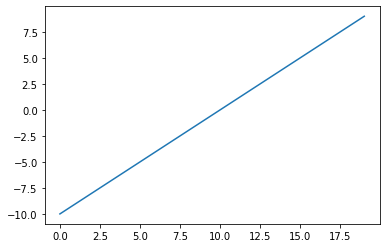

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid 
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

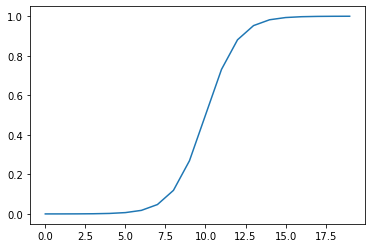

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

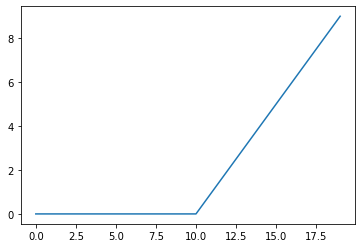

In [ ]:
# Let's recreate the relu fucntion
def relu(x):
  return tf.maximum(0, x)


# Lets plot our toy tensor to our custom relu function

plt.plot(relu(A))

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

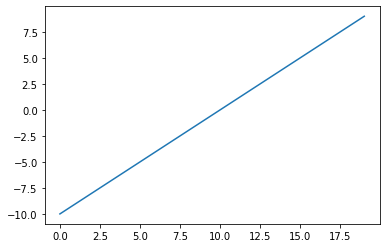

In [ ]:
# Lets' try the linear activation function
# > The linear activation function just returns tensor unmodified
plt.plot(tf.keras.activations.linear(A))
A == tf.keras.activations.linear(A)

# Evaluating and improving our classification

So far we've been training and testing on the same dataset. In machine learning this is basically considered a sin

In [ ]:
# Split into our train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape


((800, 2), (200, 2))

In [ ]:
# Let's recreate a model to fit on training data and evaluate on the tesing set

# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_8.fit(X_train, y_train, epochs=25, verbose=1)
model_8.evaluate(X_test, y_test)


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


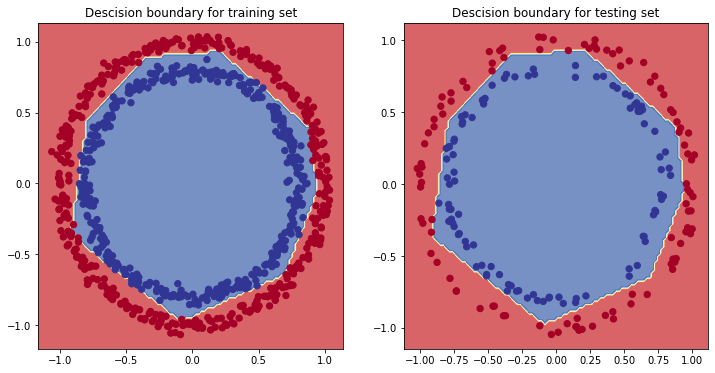

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Descision boundary for training set')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Descision boundary for testing set')
plot_decision_boundary(model_8, X_test, y_test)

Text(0.5, 1.0, 'Model_8 loss curves')

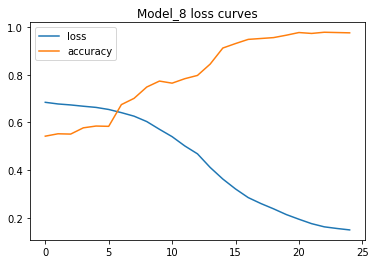

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

In [ ]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264281272888184,
  0.6038310527801514,
  0.5714036226272583,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.25971999764442444,
  0.23746901750564575,
  0.21351958

# Finding the best learning rate
To find the ideal learning rate we're going to use to following steps

* A learning rate **callback** - you can think of callback as an extra piece of func you can add to your model while it's training.

* Another model 

* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

# Create a non-linear function
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])


# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the recompiled model
history_9 = model_9.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])
model_9.evaluate(X_test, y_test)


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

[0.6933157444000244, 0.4950000047683716]

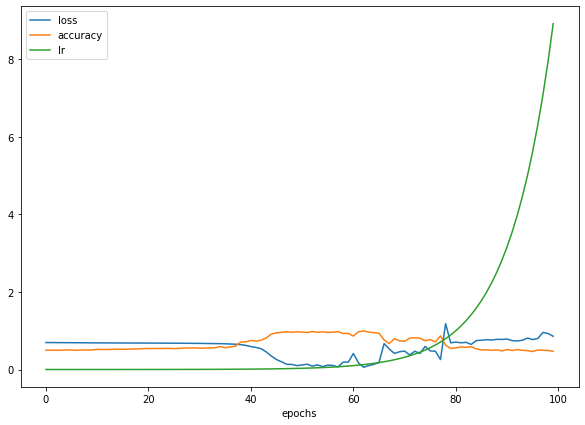

In [ ]:
# Checkout the history 
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')
plt.show()

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))


Text(0.5, 1.0, 'Learning Rate vs Loss')

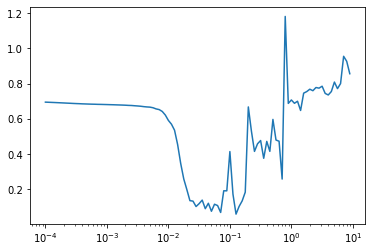

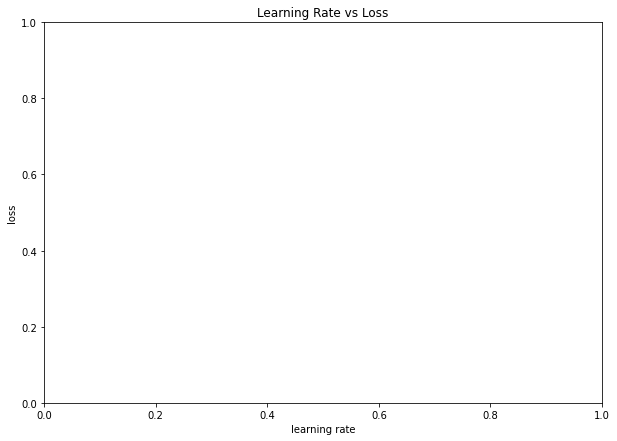

In [ ]:
plt.semilogx(lrs, history_9.history['loss'])
plt.figure(figsize=(10, 7))
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning Rate vs Loss')


In [ ]:
# Example of other typical learning rate values are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
0.003, 0.0025